In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:

# Define the device
dev = qml.device("default.qubit", wires=3)

# Define the quantum circuit
@qml.qnode(dev)
def quantum_circuit():
    # Apply gates to qubits
    qml.Hadamard(wires=0)
    qml.RZ(0.40, wires=0)
    qml.Hadamard(wires=1)
    qml.RY(0.50, wires=1)
    qml.RX(0.50, wires=2)
    
    # Apply CNOT gates
    qml.CNOT(wires=[2, 0])
    qml.CNOT(wires=[2, 1])
    
    # Return measurements of all qubits
    return qml.probs(wires=[0, 1, 2])

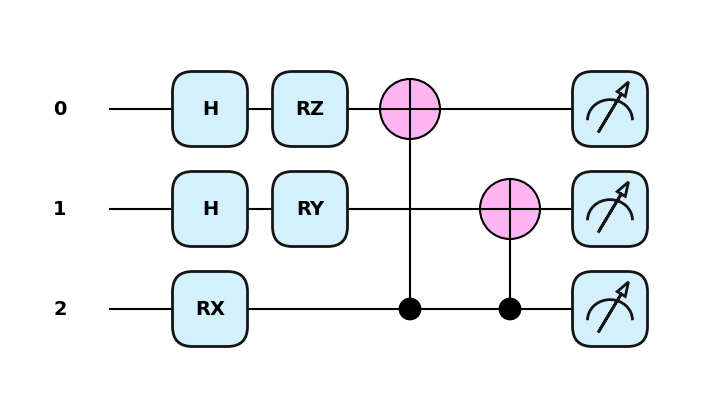

In [4]:
qml.draw_mpl(quantum_circuit,style='pennylane')();

In [5]:
quantum_circuit()

tensor([0.12217769, 0.02263844, 0.34721795, 0.00796592, 0.12217769,
        0.02263844, 0.34721795, 0.00796592], requires_grad=True)

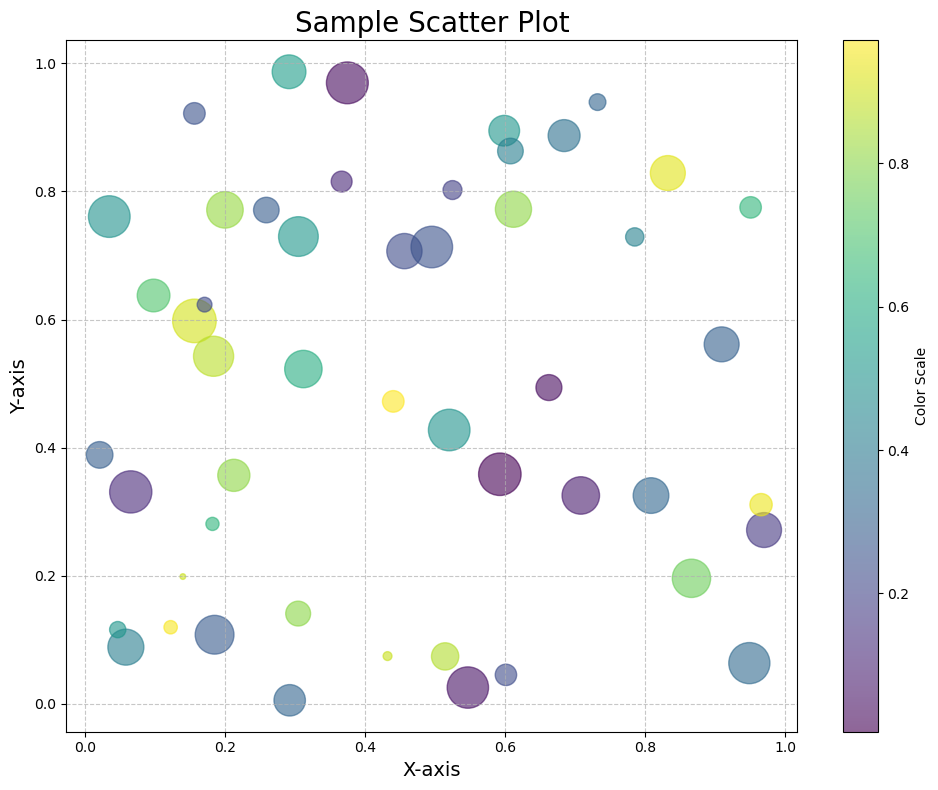

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(42)  # for reproducibility
num_points = 50
x = np.random.rand(num_points)
y = np.random.rand(num_points)
colors = np.random.rand(num_points)
sizes = 1000 * np.random.rand(num_points)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')

# Customize the plot
plt.title('Sample Scatter Plot', fontsize=20)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.colorbar(label='Color Scale')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
import pennylane as qml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Define the device
dev = qml.device("default.qubit", wires=3)

# Define the quantum circuit
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encode input data
    qml.RY(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    qml.RY(inputs[2], wires=2)
    
    # Apply gates to qubits
    qml.Hadamard(wires=0)
    qml.RZ(weights[0], wires=0)
    qml.Hadamard(wires=1)
    qml.RY(weights[1], wires=1)
    qml.RX(weights[2], wires=2)
    
    # Apply CNOT gates
    qml.CNOT(wires=[2, 0])
    qml.CNOT(wires=[2, 1])
    
    # Return measurements of all qubits
    return qml.probs(wires=[0, 1, 2])

# Define a cost function (binary cross-entropy)
def cost(weights, X, y):
    predictions = [quantum_circuit(x, weights) for x in X]
    return log_loss(y, [p[0] for p in predictions])

# Generate some dummy data
np.random.seed(42)
X = np.random.rand(100, 3)
y = np.random.randint(0, 2, 100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize weights
init_weights = np.random.rand(3)

# Optimize the circuit
opt = qml.GradientDescentOptimizer(stepsize=0.1)
weights = init_weights

for i in range(100):
    weights = opt.step(lambda w: cost(w, X_train_scaled, y_train), weights)
    
    if (i + 1) % 10 == 0:
        print(f"Step {i+1}, Cost: {cost(weights, X_train_scaled, y_train):.4f}")

# Make predictions
def classify(X, weights):
    predictions = [quantum_circuit(x, weights) for x in X]
    return [1 if p[0] > 0.5 else 0 for p in predictions]

y_pred = classify(X_test_scaled, weights)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate final cost
final_cost = cost(weights, X_test_scaled, y_test)
print(f"Final Test Cost: {final_cost:.4f}")

C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 10, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 20, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 30, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 40, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 50, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 60, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 70, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 80, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 90, Cost: 2.4316


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 100, Cost: 2.4316
Test Accuracy: 0.5000
Final Test Cost: 1.6182


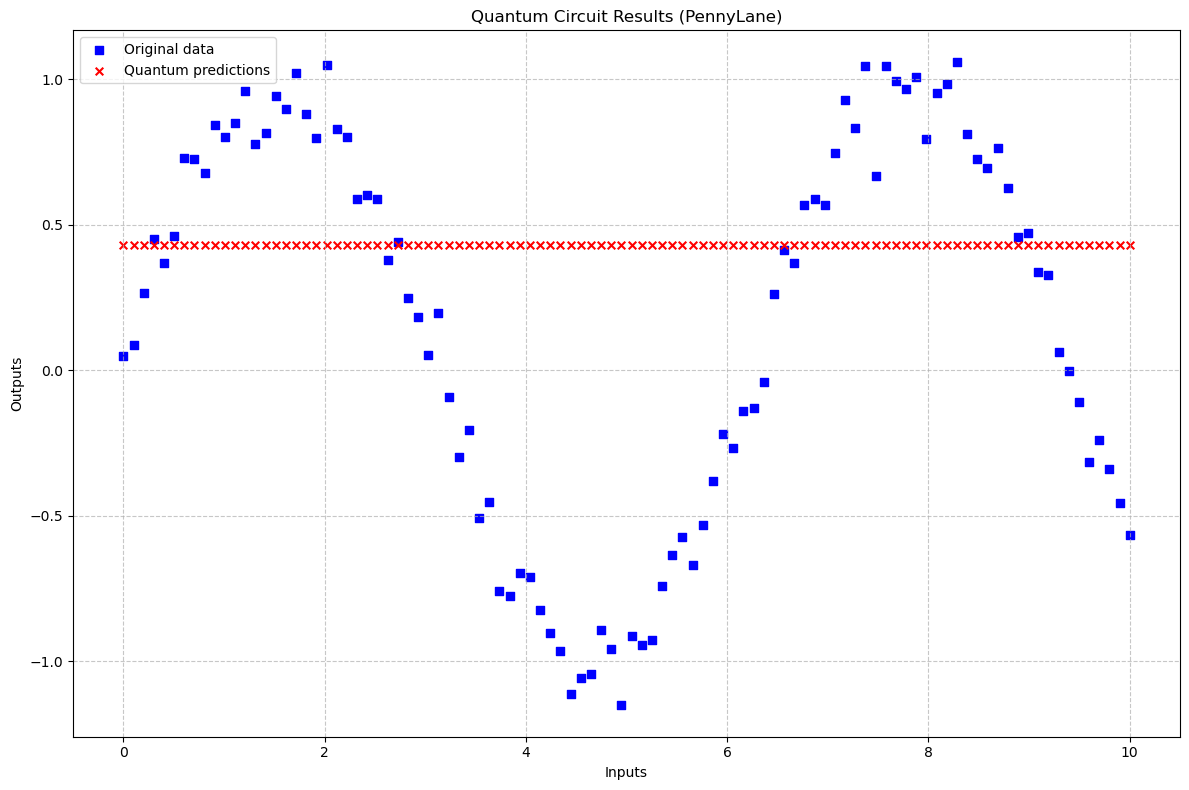

Example prediction (probabilities):
[0.12217769 0.00796592 0.02263844 0.34721795 0.12217769 0.00796592
 0.02263844 0.34721795]


In [7]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Define the device
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def quantum_circuit(inputs, params):
    # Apply Hadamard gates
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    
    # Apply rotation gates with parameters
    qml.RZ(params['rz'], wires=0)
    qml.RY(params['ry'], wires=1)
    qml.RX(params['rx'], wires=2)
    
    # Apply CNOT gate
    qml.CNOT(wires=[1, 2])
    
    # Return probabilities
    return qml.probs(wires=[0, 1, 2])

# Generate sample data
np.random.seed(42)
num_samples = 100
X = np.linspace(0, 10, num_samples)
Y = np.sin(X) + np.random.normal(0, 0.1, num_samples)

# Define parameters for the quantum circuit
params = {
    'rz': 0.40,
    'ry': 0.50,
    'rx': 0.50
}

# Generate predictions using the quantum circuit
predictions = [quantum_circuit(x, params) for x in X]

def plot_results(X, Y, predictions):
    plt.figure(figsize=(12, 8))
    
    plt.scatter(X, Y, s=30, c='b', marker="s", label='Original data')
    
    # Plot the most probable outcome for each prediction
    Y_pred = [np.argmax(pred) / 7 for pred in predictions]  # Normalize to [0, 1] range
    plt.scatter(X, Y_pred, s=30, c='r', marker="x", label='Quantum predictions')
    
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    plt.title("Quantum Circuit Results (PennyLane)")
    
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(X, Y, predictions)

# Print example prediction
print("Example prediction (probabilities):")
print(predictions[0])

In [8]:
dev = qml.device("default.qubit", wires=3)

In [9]:
@qml.qnode(dev)
def quantum_circuit(inputs, params):
    # Encode the input
    qml.RY(inputs, wires=0)
    
    # Apply Hadamard gates
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    
    # Apply rotation gates with parameters
    qml.RZ(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RX(params[2], wires=2)
    
    # Apply CNOT gate
    qml.CNOT(wires=[1, 2])
    
    # Return expectation value of PauliZ on the first wire
    return qml.expval(qml.PauliZ(0))

In [10]:
def square_loss(labels, predictions):
    return np.mean((labels - predictions) ** 2)

In [11]:
def cost(params, inputs, labels):
    predictions = np.array([quantum_circuit(x, params) for x in X])
    return square_loss(labels, predictions)

In [12]:
# Generate sample data
np.random.seed(42)
num_samples = 100
X = np.linspace(0, 2*np.pi, num_samples)
Y = np.sin(X) + np.random.normal(0, 0.1, num_samples)

In [13]:
# Normalize Y to [-1, 1] range
Y = 2 * (Y - Y.min()) / (Y.max() - Y.min()) - 1

In [14]:
# Split data into train and test sets
train_size = 100
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [15]:
params = np.array([0.40, 0.50, 0.50])

In [16]:
# Create optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)

In [17]:
# Train the circuit
steps = 100

for i in range(steps):
    # Use a lambda function that only takes params as argument
    params = opt.step(lambda p: cost(p, X_train, Y_train), params)
    
    if (i + 1) % 10 == 0:
        current_cost = cost(params, X_train, Y_train)
        print(f"Step {i + 1}, Cost: {current_cost:.4f}")

C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 10, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 20, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 30, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 40, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 50, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 60, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 70, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 80, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 90, Cost: 0.8467


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\pennylane\_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable

Step 100, Cost: 0.8467


In [18]:
# Generate predictions
train_predictions = np.array([quantum_circuit(x, params) for x in X_train])
test_predictions = np.array([quantum_circuit(x, params) for x in X_test])

In [19]:
def plot_results(X_train, Y_train, X_test, Y_test, train_predictions, test_predictions):
    plt.figure(figsize=(12, 8))
    
    plt.scatter(X_train, Y_train, s=30, c='b', marker="s", label='Train data')
    plt.scatter(X_test, Y_test, s=30, c='k', marker="s", label='Test data')
    plt.plot(X_train, train_predictions, 'r-', label='Quantum predictions (train)')
    plt.plot(X_test, test_predictions, 'm-', label='Quantum predictions (test)')
    
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    plt.title("Trained Quantum Circuit Results (PennyLane)")
    
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()



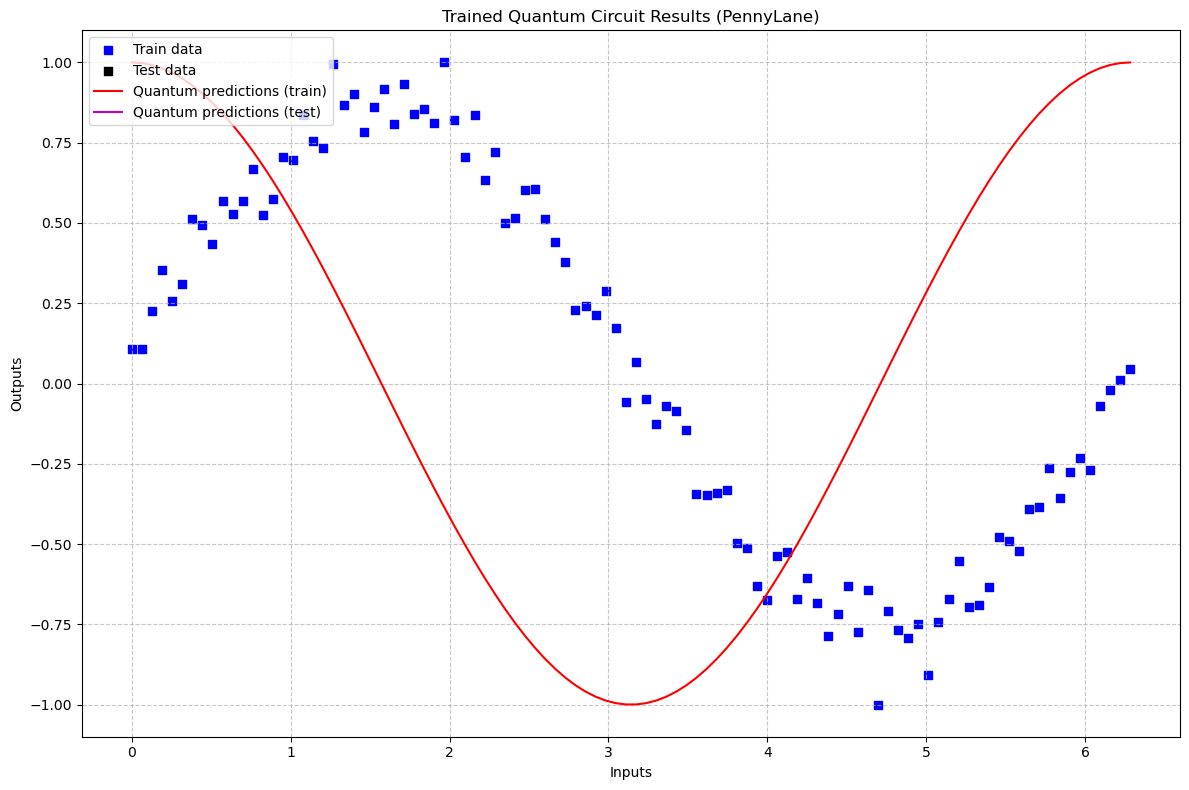

In [20]:
# Plot the results
plot_results(X_train, Y_train, X_test, Y_test, train_predictions, test_predictions)

In [21]:
# Generate predictions for test data
test_predictions = np.array([quantum_circuit(x, params) for x in X_test])


# Print final parameters and test loss
print("Final Parameters:", params)

Final Parameters: [0.4 0.5 0.5]


In [22]:
# Calculate test loss
# Calculate the differences
differences = Y_test - test_predictions

# Square the differences
squared_differences = np.square(differences)

# Calculate the mean of the squared differences
test_loss = np.mean(squared_differences)

# Print the test loss
print(f"Test Loss: {test_loss:.4f}")

Test Loss: nan


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
